In [1]:
%pip install imageio numpy pandas matplotlib scikit-image

  Using cached imageio-2.35.1-py3-none-any.whl.metadata (4.9 kB)
  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached scikit_image-0.24.0-cp312-cp312-win_amd64.whl.metadata (14 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl.metadata (165 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached tifffile-2024.8.30-py3-none-any.whl.metadata (31 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached imageio-2.35.1-py3-none-any.whl (315 kB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/

In [194]:
from imageio.v3 import imread
from skimage.filters import try_all_threshold
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.feature import canny
from skimage.measure import regionprops, label
from skimage.morphology import binary_dilation, square

In [266]:
img = imread('images/paper.jpg')

In [272]:
roi = cv2.addWeighted(img, 1.5, img, 0, int(round(255*(1-1.5)/2))).astype('uint8')[300:900, 400:1100]
edges = canny(roi[:, :, 2])

In [273]:
lb = label(binary_dilation(edges, square(3)))
rps = regionprops(lb)

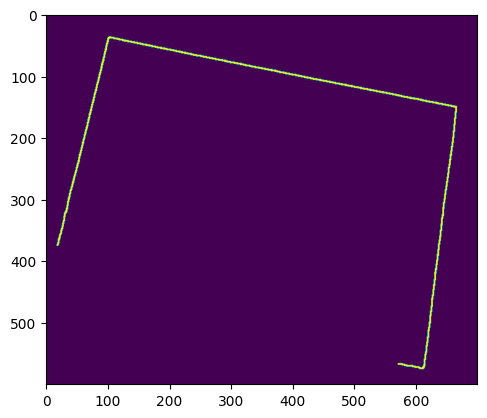

In [276]:
plt.imshow(rect)

In [275]:
areas = [rp.area for rp in rps]
mx = areas.index(max(areas))
rect = lb == (mx + 1)

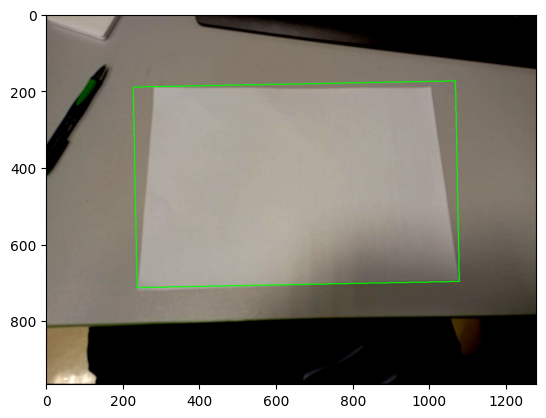

In [264]:
nz = np.array(list(zip(*np.nonzero(rect))))
pnts = np.int64(cv2.boxPoints(cv2.minAreaRect(nz)))
pnts[:, [0, 1]] = pnts[:, [1, 0]]
plt.imshow(cv2.drawContours(roi, [pnts], 0, (0, 255, 0), 2))

In [108]:
np.array(list(zip(*np.nonzero(rect))))

array([[ 37, 103],
       [ 37, 104],
       [ 38, 101],
       ...,
       [574, 608],
       [574, 609],
       [574, 610]])